# Exploratory Data Analysis (EDA) for Saber Categories Dataset

This notebook provides an exploratory data analysis (EDA) focused on categorical and text features in the Saber Categories dataset. The goal is to understand the structure, quality, and key characteristics of the data before building classification models.

## 1. Import Required Libraries

We will use the following libraries for our EDA:
- pandas: for data manipulation
- numpy: for numerical operations (if needed)
- matplotlib & seaborn: for visualization
- missingno: for visualizing missing data
- arabic_reshaper & python-bidi: for correct Arabic text display in plots

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import arabic_reshaper
from bidi.algorithm import get_display

# Set visualization styles
sns.set(style='whitegrid')
%matplotlib inline

## 2. Load the Dataset

We will load the Saber Categories dataset from the provided CSV file using pandas. This step is essential to begin our analysis of categorical and text features.

In [2]:
# Load the Saber Categories dataset
file_path = 'Saber Categories-1.csv'
df = pd.read_csv(file_path)

# Display the shape of the dataset
df.shape

(100, 9)

## 3. View Dataset Structure

Understanding the structure of the dataset helps identify the types of features available, their data types, and the overall shape of the data, especially for categorical and text columns.

In [3]:
# Display the first few rows of the dataset
df.head()

,Service,Category,SubCategory,SubCategory_Prefix,SubCategory_Keywords,SubCategory2,SubCategory2_Prefix,SubCategory2_Keywords,Unnamed: 8
0,SASO - Products Safety and Certification,Saber,الشهادات الصادرة من الهيئة,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,شهادة المطابقة الخليجية Gmark-GSO,مطابقة خليجية G-mark,شهادة المطابقة الخليجية,GSO-Gmark- شهادة المطابقة الخليجية,NaN
1,SASO - Products Safety and Certification,Saber,جهات المطابقة,مايخص جهات تقويم المطابقة في قبول الطلبات وظهو...,الغاء طلب-قبول طلب,قبول الطلب,قبول طلب مطابقة مقدم من قبل العميل,الغاء طلب-قبول طلب,NaN
2,SASO - Products Safety and Certification,Saber,الشهادات الصادرة من الهيئة,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,QM-quality mark- علامة الجودة,علامة الجودة,شهادة مطابقة علامة الجودة,quality mark- علامة الجودة-QM,NaN
3,SASO - Products Safety and Certification,Saber,إضافة المنتجات,إضافة المنتجات من قبل العميل في المسار التجاري,لائحة المنتجات- صفحة المنتجات,عدم ظهور المنتجات,المنتج لايظهر في قائمة المنتجات بعد الاضافة,اضافة منتج -اضافة منتجات,NaN
4,SASO - Products Safety and Certification,Saber,مدير النظام,صفحة مدير النظام,مدير نظام,عدم ظهور الطلبات,عدم ظهور طلبات عند البحث كمدير نظام,الطلب لا يظهر لمدير النظام,NaN


In [4]:
# Display dataset info and columns
df.info()
print("\nColumns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Service                100 non-null    object
 1   Category               100 non-null    object
 2   SubCategory            100 non-null    object
 3   SubCategory_Prefix     100 non-null    object
 4   SubCategory_Keywords   100 non-null    object
 5   SubCategory2           100 non-null    object
 6   SubCategory2_Prefix    100 non-null    object
 7   SubCategory2_Keywords  100 non-null    object
 8   Unnamed: 8             1 non-null      object
dtypes: object(9)
memory usage: 7.2+ KB

Columns: ['Service', 'Category', 'SubCategory', 'SubCategory_Prefix ', 'SubCategory_Keywords', 'SubCategory2', 'SubCategory2_Prefix ', 'SubCategory2_Keywords', 'Unnamed: 8']


In [5]:
df.drop(columns=['Unnamed: 8'], inplace=True)

## 4. Check for Missing Values

Checking for missing values is crucial to assess data quality and decide on imputation or removal strategies, especially for categorical and text columns.

In [6]:
# Check for missing values in each column
df.isnull().sum()

Service                  0
Category                 0
SubCategory              0
SubCategory_Prefix       0
SubCategory_Keywords     0
SubCategory2             0
SubCategory2_Prefix      0
SubCategory2_Keywords    0
dtype: int64

## 5. Univariate Analysis: Categorical Features

Univariate analysis of categorical features helps to understand the frequency and distribution of each category in the dataset.

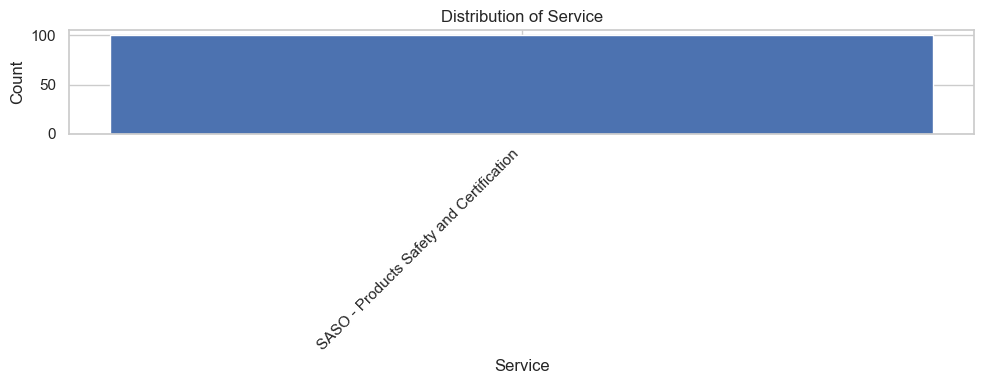

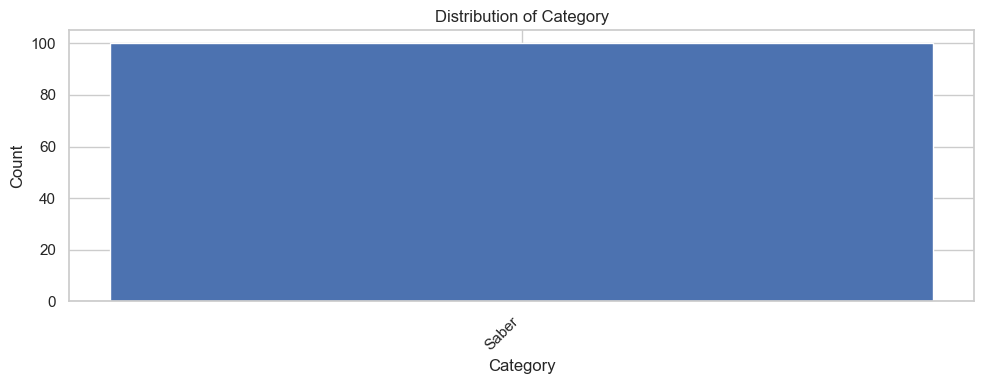

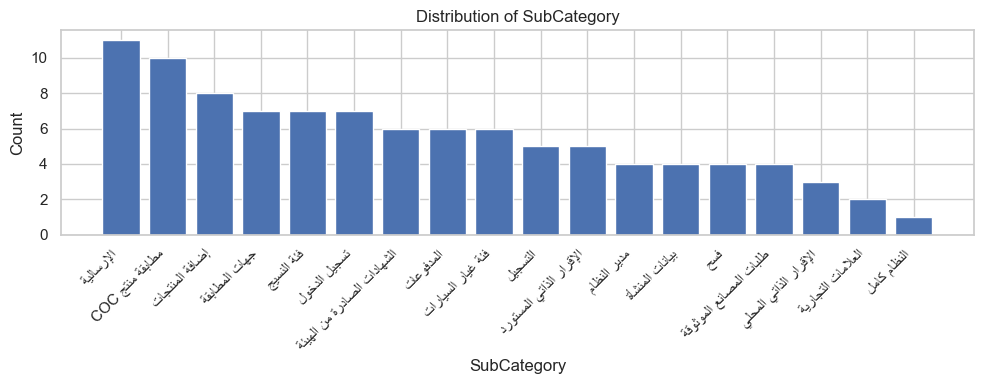

C:\Users\ASUS\AppData\Local\Temp\ipykernel_852\3197840844.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


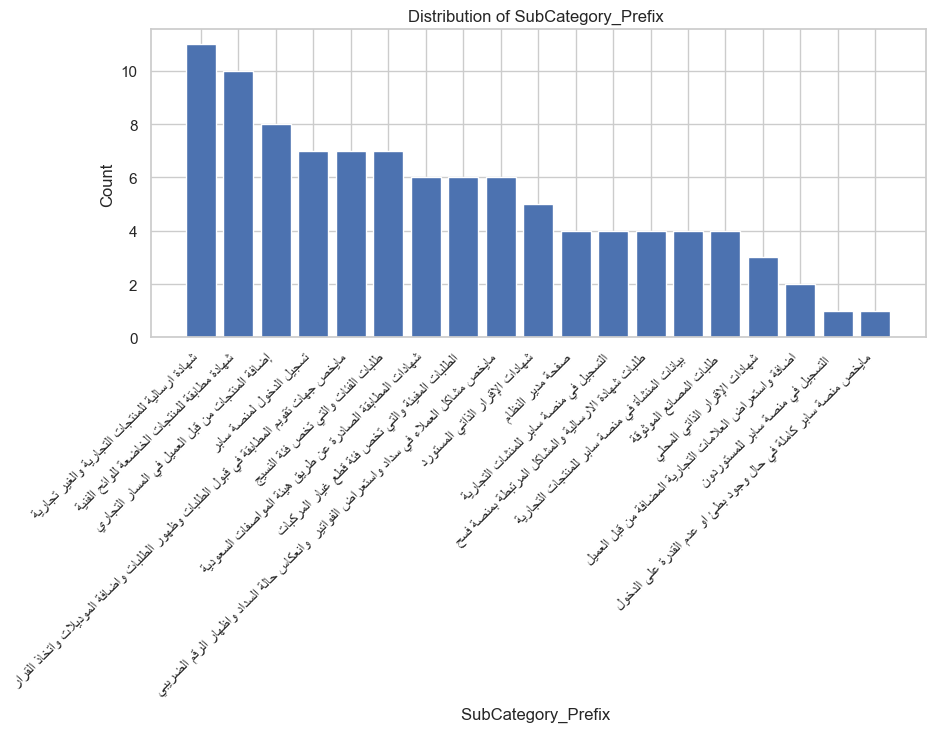

C:\Users\ASUS\AppData\Local\Temp\ipykernel_852\3197840844.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


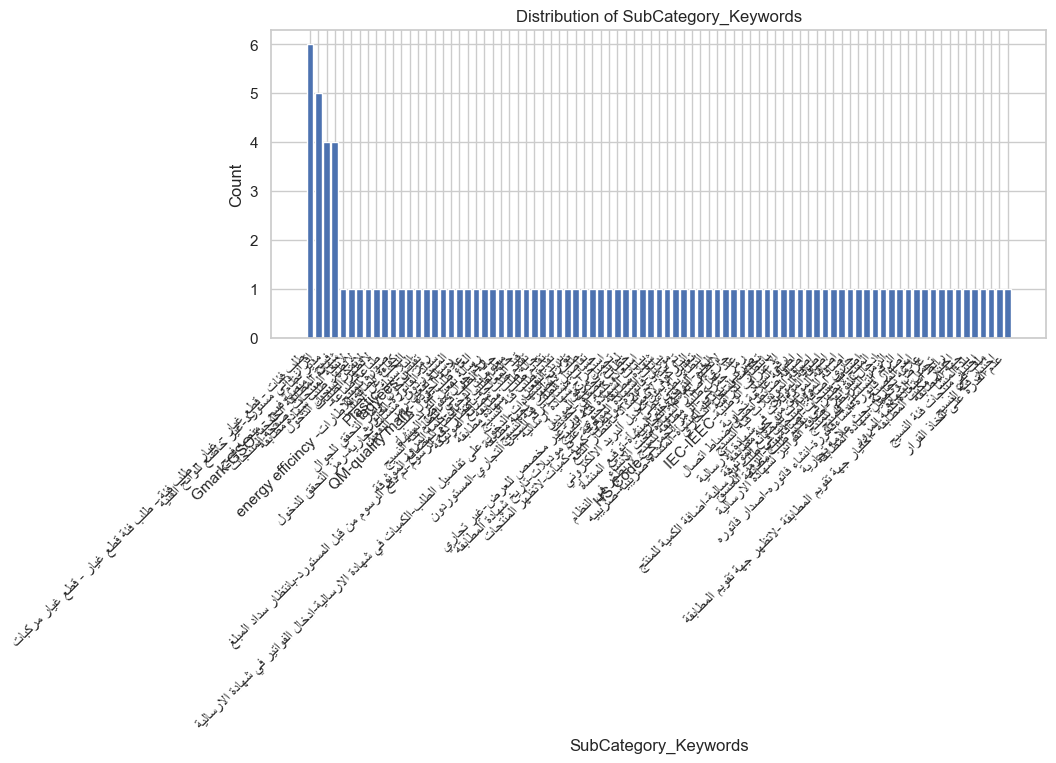

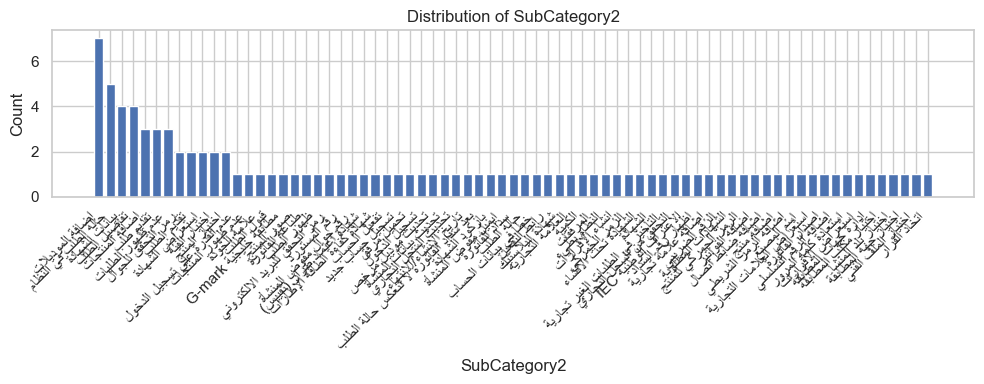

C:\Users\ASUS\AppData\Local\Temp\ipykernel_852\3197840844.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


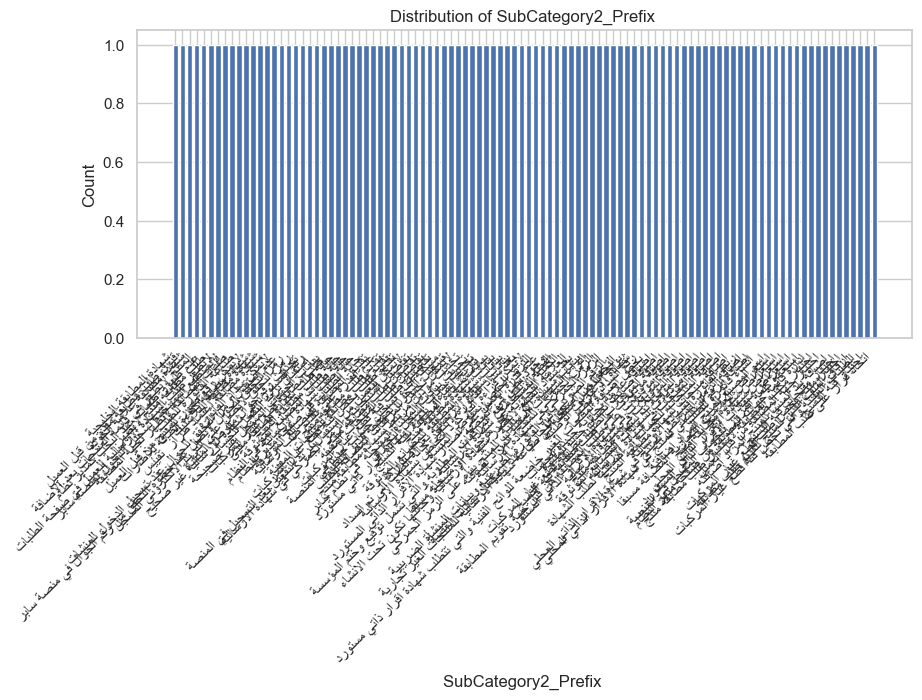

C:\Users\ASUS\AppData\Local\Temp\ipykernel_852\3197840844.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


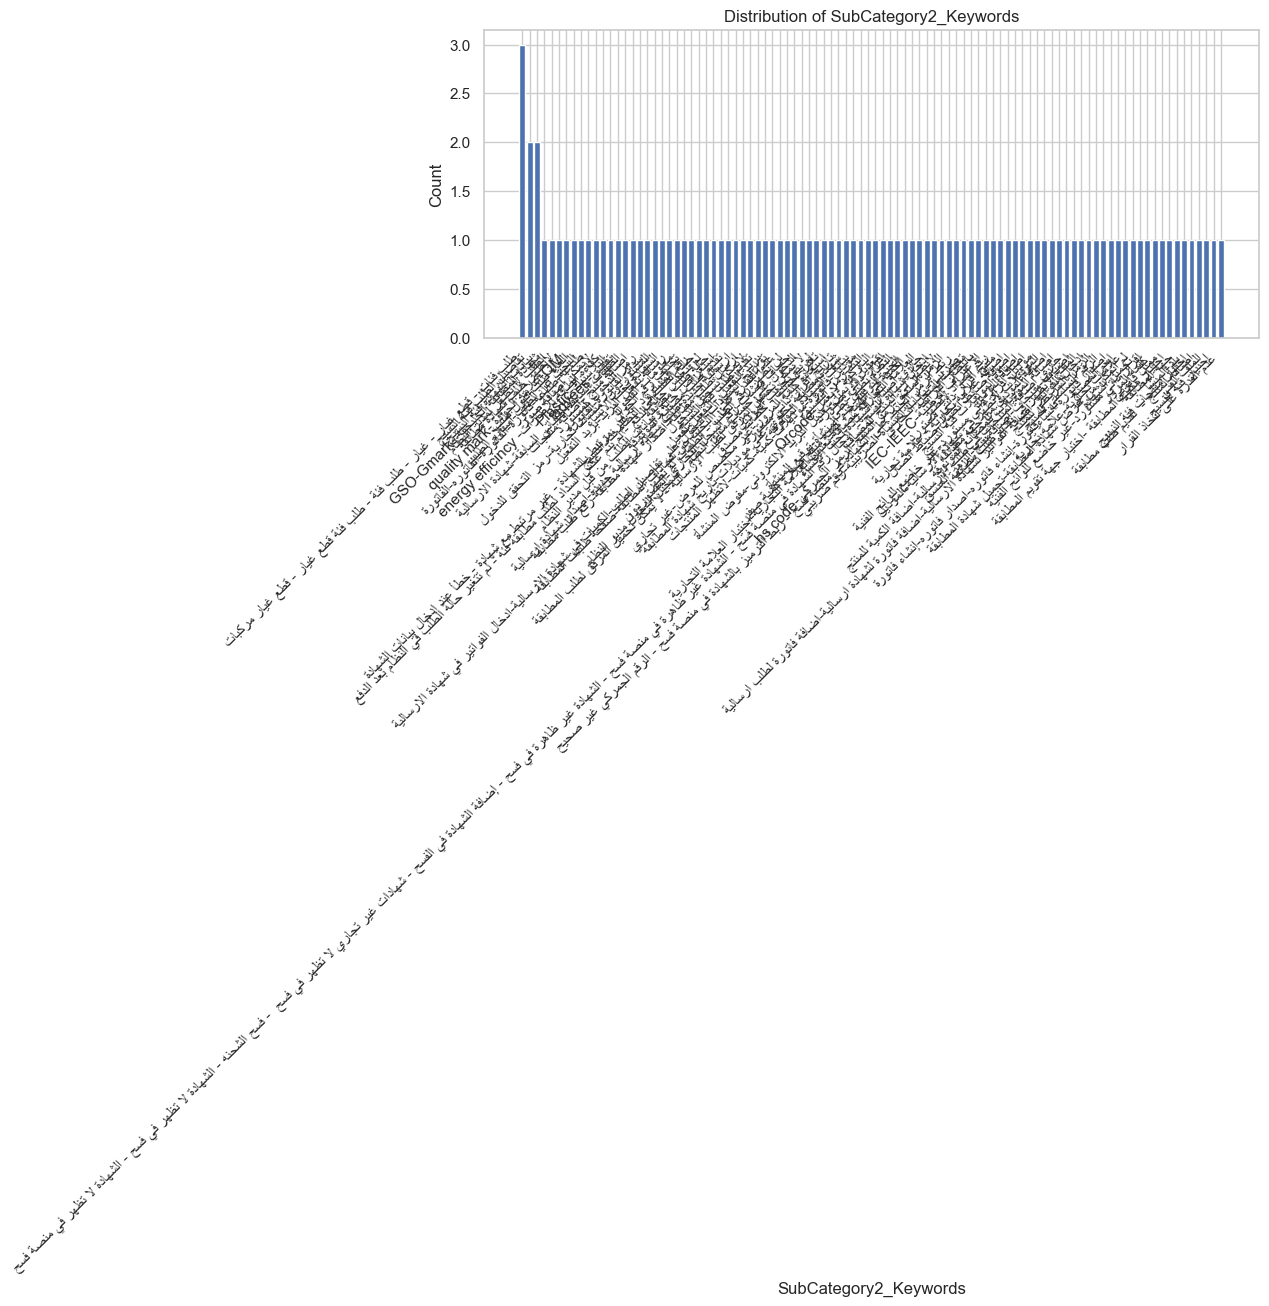

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# Plot bar charts for categorical columns with Arabic reshaping and bidi
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    value_counts = df[col].value_counts(dropna=False)
    labels = [get_display(arabic_reshaper.reshape(str(lbl))) for lbl in value_counts.index]
    plt.bar(labels, value_counts.values)
    plt.title(get_display(arabic_reshaper.reshape(f'Distribution of {col}')))
    plt.xlabel(get_display(arabic_reshaper.reshape(col)))
    plt.ylabel(get_display(arabic_reshaper.reshape('Count')))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 6. Distribution of Target Variables

Understanding the distribution of the target variables (e.g., SubCategory, SubCategory2) is crucial for classification tasks, especially to identify class imbalance.

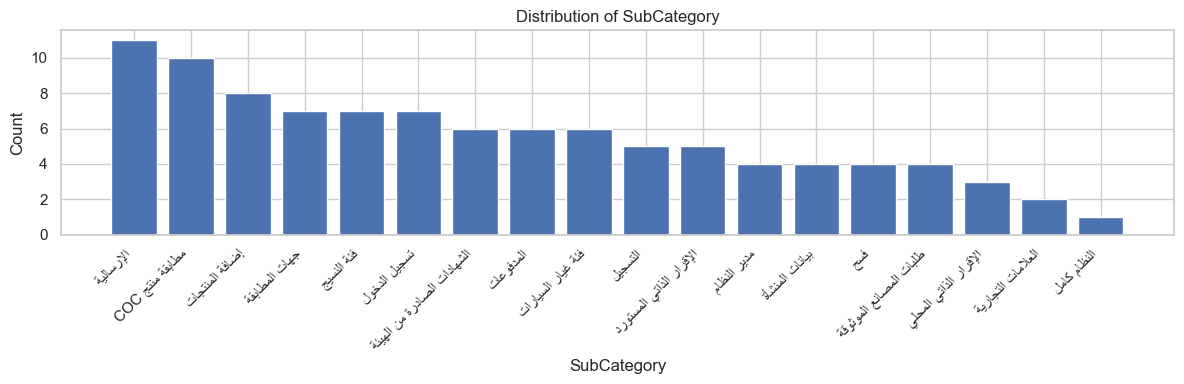

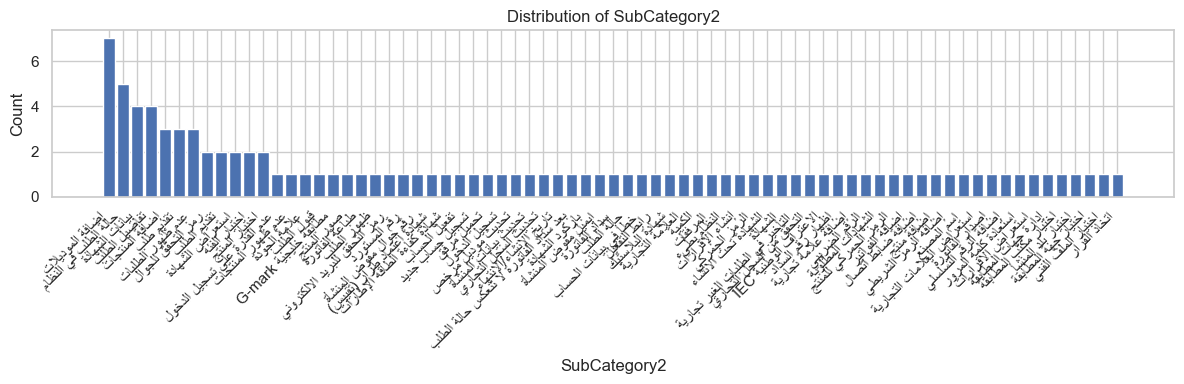

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper

# Assuming df is your DataFrame and it's already defined
# Plot the distribution of the primary and secondary target variables with Arabic reshaping
for col in ['SubCategory', 'SubCategory2']:
    if col in df.columns:
        plt.figure(figsize=(12, 4))
        value_counts = df[col].value_counts(dropna=False)
        labels = [get_display(arabic_reshaper.reshape(str(lbl))) for lbl in value_counts.index]
        plt.bar(labels, value_counts.values)
        plt.title(get_display(arabic_reshaper.reshape(f'Distribution of {col}')))
        plt.xlabel(get_display(arabic_reshaper.reshape(col)))
        plt.ylabel(get_display(arabic_reshaper.reshape('Count')))
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## 7. Advanced Arabic Text Normalization and Cleaning

In this section, we apply advanced normalization and cleaning steps for Arabic and mixed-language text, including:
- Removing diacritics and Tatweel
- Normalizing Alef, Yeh, Heh, and Hamza forms
- Unicode normalization (NFC)
- Removing excessive whitespace and normalizing punctuation
- Preserving both Arabic and English terms
- Handling numbers and non-Arabic symbols
- (Optional) Removing stopwords and duplicates

These steps ensure the data is clean, consistent, and ready for downstream NLP tasks.

In [10]:
import re
import unicodedata

# Arabic normalization helpers
def remove_diacritics(text):
    arabic_diacritics = re.compile(r"[\u0617-\u061A\u064B-\u0652\u0670\u06D6-\u06ED]")
    return re.sub(arabic_diacritics, '', text)


def normalize_numbers(text):
    # Convert Arabic-Indic digits to standard digits
    arabic_digits = '٠١٢٣٤٥٦٧٨٩'
    for i, d in enumerate(arabic_digits):
        text = text.replace(d, str(i))
    return text

def clean_text(text):
    if not isinstance(text, str):
        return text
    text = unicodedata.normalize('NFC', text)
    text = remove_diacritics(text)
    text = normalize_numbers(text)
    text = re.sub(r'[\u200f\u200e]', '', text)  # Remove LRM/RLM
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = re.sub(r'[\u061F\u06D4]', '.', text)  # Arabic question mark/period
    # Use only double quotes for the string, and escape the inner double quote
    text = re.sub(r"[\"'،؛:؛,.!?…\-\[\](){}<>]", ' ', text)  # Normalize punctuation
    text = text.strip()
    return text

# Columns to clean (all text columns)
text_cols = [
    'SubCategory', 'SubCategory_Prefix ', 'SubCategory_Keywords',
    'SubCategory2', 'SubCategory2_Prefix ', 'SubCategory2_Keywords'
]
for col in text_cols:
    if col in df.columns:
        df[col + '_clean'] = df[col].apply(clean_text)

# Show a sample of cleaned data
df[[col for col in df.columns if col.endswith('_clean')]].head()

,SubCategory_clean,SubCategory_Prefix _clean,SubCategory_Keywords_clean,SubCategory2_clean,SubCategory2_Prefix _clean,SubCategory2_Keywords_clean
0,الشهادات الصادرة من الهيئة,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,شهادة المطابقة الخليجية Gmark GSO,مطابقة خليجية G mark,شهادة المطابقة الخليجية,GSO Gmark شهادة المطابقة الخليجية
1,جهات المطابقة,مايخص جهات تقويم المطابقة في قبول الطلبات وظهو...,الغاء طلب قبول طلب,قبول الطلب,قبول طلب مطابقة مقدم من قبل العميل,الغاء طلب قبول طلب
2,الشهادات الصادرة من الهيئة,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,QM quality mark علامة الجودة,علامة الجودة,شهادة مطابقة علامة الجودة,quality mark علامة الجودة QM
3,إضافة المنتجات,إضافة المنتجات من قبل العميل في المسار التجاري,لائحة المنتجات صفحة المنتجات,عدم ظهور المنتجات,المنتج لايظهر في قائمة المنتجات بعد الاضافة,اضافة منتج اضافة منتجات
4,مدير النظام,صفحة مدير النظام,مدير نظام,عدم ظهور الطلبات,عدم ظهور طلبات عند البحث كمدير نظام,الطلب لا يظهر لمدير النظام


In [11]:
# Compare original vs cleaned text columns for a sample of rows
compare_cols = [
    'SubCategory', 'SubCategory_clean',
    'SubCategory_Prefix ', 'SubCategory_Prefix _clean',
    'SubCategory_Keywords', 'SubCategory_Keywords_clean',
    'SubCategory2', 'SubCategory2_clean',
    'SubCategory2_Prefix ', 'SubCategory2_Prefix _clean',
    'SubCategory2_Keywords', 'SubCategory2_Keywords_clean'
]
# Only keep columns that exist in the DataFrame
compare_cols = [col for col in compare_cols if col in df.columns]
df[compare_cols].sample(10, random_state=42)

,SubCategory,SubCategory_clean,SubCategory_Prefix,SubCategory_Prefix _clean,SubCategory_Keywords,SubCategory_Keywords_clean,SubCategory2,SubCategory2_clean,SubCategory2_Prefix,SubCategory2_Prefix _clean,SubCategory2_Keywords,SubCategory2_Keywords_clean
83,المدفوعات,المدفوعات,مايخص مشاكل العملاء في سداد واستعراض الفواتير ...,مايخص مشاكل العملاء في سداد واستعراض الفواتير ...,إصدار فاتورة-انشاءفاتورة-انشاء فاتوره-اصدار فا...,إصدار فاتورة انشاءفاتورة انشاء فاتوره اصدار فا...,إصدار الفاتورة,إصدار الفاتورة,انشاء فاتورة للطلب,انشاء فاتورة للطلب,إصدار فاتورة-انشاءفاتورة-انشاء فاتوره-اصدار فا...,إصدار فاتورة انشاءفاتورة انشاء فاتوره اصدار فا...
53,النظام كامل,النظام كامل,مايخص منصة سابر كاملة في حال وجود بطئ او عدم ا...,مايخص منصة سابر كاملة في حال وجود بطئ او عدم ا...,النظام بطيئ-بطئ,النظام بطيئ بطئ,النظام بطيء,النظام بطيء,وجود بطئ في المنصة,وجود بطئ في المنصة,النظام بطيئ-بطئ,النظام بطيئ بطئ
70,فئة غيار السيارات,فئة غيار السيارات,الطلبات المفيئة والتي تخص فئة قطع غيار المركبات,الطلبات المفيئة والتي تخص فئة قطع غيار المركبات,طلب فئات - قطع غيار - غيار - طلب فئة - طلب فئة...,طلب فئات قطع غيار غيار طلب فئة طلب فئة...,إضافة الموديلات,إضافة الموديلات,اضافة الموديلات لطلب مطابقة قطع غيار المركبات,اضافة الموديلات لطلب مطابقة قطع غيار المركبات,طلب فئات - قطع غيار - غيار - طلب فئة - طلب فئة...,طلب فئات قطع غيار غيار طلب فئة طلب فئة...
45,فئة النسيج,فئة النسيج,طلبات الفئات والتي تخص فئة النسيج,طلبات الفئات والتي تخص فئة النسيج,بيانات الشهادة فئة النسيج,بيانات الشهادة فئة النسيج,بيانات الشهادة,بيانات الشهادة,بيانات شهادة المطابقة لفئة النسيج,بيانات شهادة المطابقة لفئة النسيج,بيانات الشهادة فئة النسيج,بيانات الشهادة فئة النسيج
44,الإقرار الذاتي المستورد,الإقرار الذاتي المستورد,شهادات الإقرار الذاتي المستورد,شهادات الإقرار الذاتي المستورد,إقرار ذاتي مستورد-غير خاضع للوائح الفنية,إقرار ذاتي مستورد غير خاضع للوائح الفنية,تاريخ الإنشاء/الانتهاء,تاريخ الإنشاء/الانتهاء,تاريخ انشاءاو نتهاء شهادة اقرار ذاتي مستورد,تاريخ انشاءاو نتهاء شهادة اقرار ذاتي مستورد,تاريخ إقرار ذاتي مستورد,تاريخ إقرار ذاتي مستورد
39,مدير النظام,مدير النظام,صفحة مدير النظام,صفحة مدير النظام,مدير نظام,مدير نظام,تسجيل الدخول,تسجيل الدخول,تسجيل الدخول لصفحة مدير النظام,تسجيل الدخول لصفحة مدير النظام,الدخول على حساب مدير النظام - تسجيل الدخول مدي...,الدخول على حساب مدير النظام تسجيل الدخول مدي...
22,فئة غيار السيارات,فئة غيار السيارات,الطلبات المفيئة والتي تخص فئة قطع غيار المركبات,الطلبات المفيئة والتي تخص فئة قطع غيار المركبات,طلب فئات - قطع غيار - غيار - طلب فئة - طلب فئة...,طلب فئات قطع غيار غيار طلب فئة طلب فئة...,حالة الطلب في النظام,حالة الطلب في النظام,طلب مطابقة قطع غيار المركبات,طلب مطابقة قطع غيار المركبات,لم تنعكس حاله الدفع - لم يتم عكس السداد لطلب م...,لم تنعكس حاله الدفع لم يتم عكس السداد لطلب م...
80,الإرسالية,الإرسالية,شهادة ارسالية للمنتجات التجارية والغير تجارية,شهادة ارسالية للمنتجات التجارية والغير تجارية,ادخال الفواتير-اضافة الفواتير لشهادة الارسالية,ادخال الفواتير اضافة الفواتير لشهادة الارسالية,إضافة الفواتير,إضافة الفواتير,ربط الفاتورة بشهادة الارسالية,ربط الفاتورة بشهادة الارسالية,ادخال الفواتير-اضافة الفواتير لشهادة الارسالية...,ادخال الفواتير اضافة الفواتير لشهادة الارسالية...
10,إضافة المنتجات,إضافة المنتجات,إضافة المنتجات من قبل العميل في المسار التجاري,إضافة المنتجات من قبل العميل في المسار التجاري,صورة للمنتج,صورة للمنتج,صور المنتج,صور المنتج,لايمكن رفع صور للمنتج من قبل العميل,لايمكن رفع صور للمنتج من قبل العميل,لايمكن اضافة صور,لايمكن اضافة صور
0,الشهادات الصادرة من الهيئة,الشهادات الصادرة من الهيئة,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,شهادات المطابقة الصادرة عن طريق هيئة المواصفات...,شهادة المطابقة الخليجية Gmark-GSO,شهادة المطابقة الخليجية Gmark GSO,مطابقة خليجية G-mark,مطابقة خليجية G mark,شهادة المطابقة الخليجية,شهادة المطابقة الخليجية,GSO-Gmark- شهادة المطابقة الخليجية,GSO Gmark شهادة المطابقة الخليجية


In [12]:
# Save the original DataFrame
original_path = 'Saber_Categories_original.csv'
df.to_csv(original_path, index=False)
print(f'Original data saved to {original_path}')

# Save the cleaned DataFrame (only cleaned columns + original index)
clean_cols = [col for col in df.columns if col.endswith('_clean')]
df_cleaned = df[clean_cols].copy()
cleaned_path = 'Saber_Categories_cleaned.csv'
df_cleaned.to_csv(cleaned_path, index=False)
print(f'Cleaned data saved to {cleaned_path}')

Original data saved to Saber_Categories_original.csv
Cleaned data saved to Saber_Categories_cleaned.csv
